
Shravani Halaye - Stock Prediction using LSTM

Importing libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

Loading the data

In [ ]:
stock_data=pd.read_csv("tesla_stocks.csv")
stock_data.head()
stock_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3296,2023-08-03,252.039993,260.489990,252.000000,259.320007,259.320007,97569100
3297,2023-08-04,260.970001,264.769989,253.110001,253.860001,253.860001,99242600
3298,2023-08-07,251.449997,253.649994,242.759995,251.449997,251.449997,111097900
3299,2023-08-08,247.449997,250.919998,245.009995,249.699997,249.699997,96642200
3300,2023-08-09,250.869995,251.100006,241.899994,242.190002,242.190002,101267000


In [ ]:
df.shape#This line checks the shape of the dataset, which gives you the number of rows and columns.


(3301, 7)

In [ ]:
df.describe()#This function gives summery statistics about the dataset, such as mean, standard deviation, minimum, maximum, etc.

,Open,High,Low,Close,Adj Close,Volume
count,3301.000000,3301.000000,3301.000000,3301.000000,3301.000000,3.301000e+03
mean,65.368224,66.828575,63.782962,65.343448,65.343448,9.614467e+07
std,98.550565,100.786787,96.061222,98.456444,98.456444,8.108408e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,9.948000,10.146000,9.730000,9.865333,9.865333,4.472250e+07
50%,16.656668,16.897333,16.406668,16.666000,16.666000,7.926450e+07
75%,53.333332,54.804668,52.210667,53.335335,53.335335,1.226595e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


## Analysing data

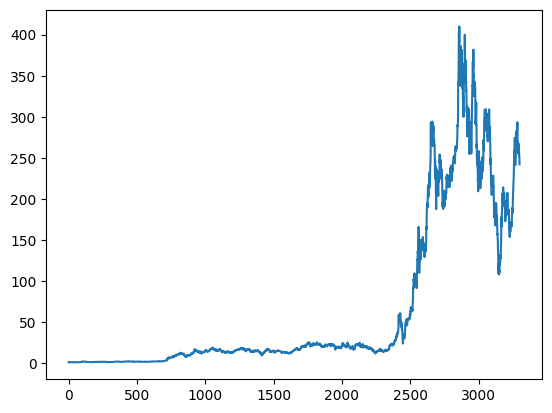

In [ ]:
df = stock_data.reset_index()['Close']
df.shape
plt.plot(stock_data['Close']);

In [ ]:
#scaling values between (0,1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))
print(df)

[[0.00131893]
 [0.00130915]
 [0.00100428]
 ...
 [0.61234154]
 [0.60806194]
 [0.58969636]]


In [ ]:
train_len = int(len(df)*0.80)
#heren we are training 80 % dataset and will be used as training set
test_len = int(len(df)-train_len)
#test of data set is used as testing dataset

train_data = df[0:train_len:]
test_data = df[train_len:len(df):1]

In [ ]:
train_len,test_len

(2640, 661)

In [ ]:
len(train_data),len(test_data)

(2640, 661)

In [ ]:
def create_dataset(dataset,time_step= 1):
    dataX,dataY =[],[]
    for i in range(len(dataset)-time_step - 1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX),np.array(dataY)

In [ ]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test = create_dataset(test_data,time_step)

In [ ]:
print(x_train.shape, y_train.shape)
print((x_test.shape),print(y_test.shape))

(2539, 100) (2539,)
(560,)
(560, 100) None


In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
model =Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
40/40 [==============================] - 11s 152ms/step - loss: 0.0011 - val_loss: 0.0057
Epoch 2/50
40/40 [==============================] - 6s 140ms/step - loss: 1.4162e-04 - val_loss: 0.0064
Epoch 3/50
40/40 [==============================] - 5s 125ms/step - loss: 1.5509e-04 - val_loss: 0.0048
Epoch 4/50
40/40 [==============================] - 6s 142ms/step - loss: 1.3269e-04 - val_loss: 0.0044
Epoch 5/50
40/40 [==============================] - 5s 123ms/step - loss: 1.4640e-04 - val_loss: 0.0060
Epoch 6/50
40/40 [==============================] - 6s 139ms/step - loss: 1.0600e-04 - val_loss: 0.0043
Epoch 7/50
40/40 [==============================] - 5s 122ms/step - loss: 1.1254e-04 - val_loss: 0.0039
Epoch 8/50
40/40 [==============================] - 5s 127ms/step - loss: 1.0515e-04 - val_loss: 0.0063
Epoch 9/50
40/40 [==============================] - 6s 137ms/step - loss: 8.8489e-05 - val_loss: 0.0112
Epoch 10/50
40/40 [==============================] - 5s 126ms/step 

In [ ]:
#predicting and checcking performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)


18/18 [==============================] - 1s 32ms/step


In [ ]:
train_predict =scaler.inverse_transform(train_predict)
test_predict= scaler.inverse_transform(test_predict)


In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
#calculate RMSE performance metrics for train data
math.sqrt(mean_squared_error(y_train,train_predict))

36.10076528268264

In [ ]:
#shift train prediction for plotting
look_back=100
trainPredictPlot=np.empty_like(df)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, : ] = train_predict

In [ ]:
#shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1 : len(df)-1, :]= test_predict

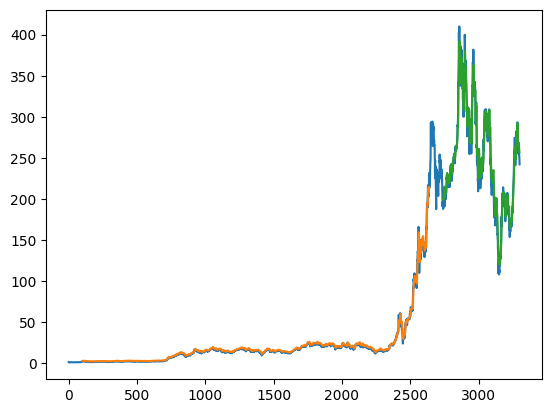

In [ ]:
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

661

In [ ]:
x_input = test_data[152:].reshape(1,-1)
x_input.shape

(1, 509)

In [ ]:
temp_input=list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.5759201236570771,
 0.5759771792916986,
 0.5769390525308692,
 0.5799633337519027,
 0.5673038669091376,
 0.5792541207931391,
 0.5761809567518045,
 0.5744120682309775,
 0.5861748511557371,
 0.5820338387380188,
 0.5567637927637618,
 0.5400855975868413,
 0.5590625545251678,
 0.546411260496723,
 0.5519461803890077,
 0.5731730187139253,
 0.5749582137356162,
 0.5771673093061591,
 0.5689830867936153,
 0.5777542381813596,
 0.5932341696572759,
 0.5971550956685384,
 0.5958263799606232,
 0.5944406061726004,
 0.5954024794117709,
 0.6111758569841422,
 0.6119502568185848,
 0.6127572721002411,
 0.5976034388502842,
 0.6030894759222678,
 0.6043040461241359,
 0.6135479808810337,
 0.6144935843016308,
 0.6165314762860191,
 0.5926309318357255,
 0.60013859351901,
 0.6103770120713201,
 0.6117627858593429,
 0.6286774106258735,
 0.6425107352190397,
 0.6312614847971909,
 0.6343183423376617,
 0.6295659584118494,
 0.6293540081374231,
 0.6344976796103601,
 0.6337313743346847,
 0.6354921267234819,
 0.6443448497433

In [ ]:

lst_output = []
n_steps = 100
i = 0
while i<30:
    if len(temp_input) >= n_steps:
        x_input = np.array(temp_input[:n_steps])  # Use the first n_steps
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape(1, len(temp_input), 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)


0 day input [0.57592012 0.57597718 0.57693905 0.57996333 0.56730387 0.57925412
 0.57618096 0.57441207 0.58617485 0.58203384 0.55676379 0.5400856
 0.55906255 0.54641126 0.55194618 0.57317302 0.57495821 0.57716731
 0.56898309 0.57775424 0.59323417 0.5971551  0.59582638 0.59444061
 0.59540248 0.61117586 0.61195026 0.61275727 0.59760344 0.60308948
 0.60430405 0.61354798 0.61449358 0.61653148 0.59263093 0.60013859
 0.61037701 0.61176279 0.62867741 0.64251074 0.63126148 0.63431834
 0.62956596 0.62935401 0.63449768 0.63373137 0.63549213 0.64434485
 0.63772566 0.64298352 0.65421643 0.65858566 0.6644875  0.68463014
 0.70670474 0.70194415 0.70319137 0.72617893 0.73896064 0.83285102
 0.8276095  0.84344815 0.87538619 0.90551459 0.98262076 0.95279394
 0.98691664 1.         0.99362545 0.9454086  0.83174238 0.86797637
 0.86435702 0.8398288  0.82350111 0.8571999  0.88514365 0.89115139
 0.92431218 0.94046054 0.90146321 0.90714489 0.87936421 0.92425516
 0.93058896 0.89002649 0.88154879 0.82478908 0.8199

In [ ]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [ ]:
len(df)

3301

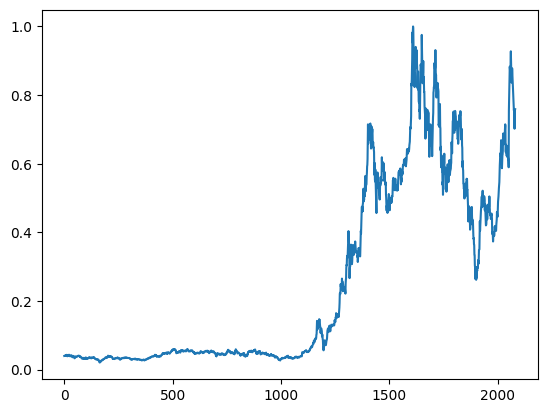

In [ ]:

df3= df.tolist()
df3.extend(lst_output)
plt.plot(df3[1250:]);